## Importing Libraries

In [57]:
import numpy as np
import tensorflow as tf
import pickle
import string
#import matplotlib.pyplot as plt
import os
import re
import random
from tensorflow import keras
from time import time
#from tqdm import tqdm
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import corpus_bleu

from os import listdir
from pickle import dump , load
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import string
from keras.preprocessing.text import Tokenizer
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

## Prepare the Photo Dataset

The following function, will load each photo, prepare it for VGG model, and collect the predicted features from the VGG model. The image features are a 1-dimensional 4,096 element vector.
The VGG architecture is the basis of ground-breaking object recognition models.
Read more at: https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/
<br> **VGG Architecture:**
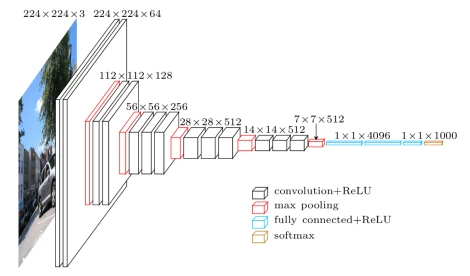
The function returns a dictionary of image identifier to image features.

In [2]:
# extract features from each photo in the directory
def extract_features(directory):
    # load the model
    model = VGG16()
    # re-structure the model
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # summarize
    print(model.summary())
    # extract features from each photo
    features = dict()
    for name in listdir(directory):
        # load an image from file
        filename = directory+ "/" + name
        image = load_img(filename, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        # get features
        feature = model.predict(image, verbose=0)
        # get image id
        image_id = name.split('.')[0]
        # store feature
        features[image_id] = feature
        print('>%s' % name)
    return features
 
# extract features from all images
directory = 'Dataset\Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features.pkl', 'wb'))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

>1225443522_1633e7121f.jpg
>1227655020_b11a1bb112.jpg
>1229756013_94663527d7.jpg
>1231229740_8dcbf80bfb.jpg
>1232148178_4f45cc3284.jpg
>1234293791_6566284bcd.jpg
>1234817607_924893f6e1.jpg
>1235580648_7eebaed9bc.jpg
>1235681222_819231767a.jpg
>1235685934_be89b231fb.jpg
>1236951314_0308dc4138.jpg
>1236964638_1808784a3c.jpg
>1237985362_dbafc59280.jpg
>123889082_d3751e0350.jpg
>123997871_6a9ca987b1.jpg
>1240297429_c36ae0c58f.jpg
>124195430_d14028660f.jpg
>1244140539_da4804d828.jpg
>1244306891_8e78ae1620.jpg
>1244485675_822e6efe60.jpg
>1245022983_fb329886dd.jpg
>1247181182_35cabd76f3.jpg
>1248357227_2b4175fc39.jpg
>1248734482_3038218f3b.jpg
>124881487_36e668145d.jpg
>1248940539_46d33ed487.jpg
>1248953128_24c9f8d924.jpg
>124972799_de706b6d0b.jpg
>1251558317_4ef844b775.jpg
>1252396628_eb81d3905b.jpg
>1252787177_4b08625897.jpg
>125319704_49ead3463c.jpg
>1253264731_e7c689eca5.jpg
>1253275679_e955fb7304.jpg
>1255504166_f2437febcb.jpg
>1258913059_07c613f7ff.jpg
>1259936608_e3f0064f23.jpg
>126081

>1459250022_bf1eddad11.jpg
>1460352062_d64fb633e0.jpg
>1460500597_866fa0c6f3.jpg
>146098876_0d99d7fb98.jpg
>146100443_906d87faa2.jpg
>1461329041_c623b06e5b.jpg
>1461653394_8ab96aae63.jpg
>1461667284_041c8a2475.jpg
>1463638541_c02cfa04dc.jpg
>1463732130_a754441289.jpg
>1463732807_0cdf4f22c7.jpg
>1464120327_d90279ca3a.jpg
>1465666502_de289b3b9c.jpg
>146577645_91b570c0d0.jpg
>146577646_9e64b8c2dc.jpg
>1466307485_5e6743332e.jpg
>1466307489_cb8a74de09.jpg
>1466479163_439db855af.jpg
>1467533293_a2656cc000.jpg
>1468103286_96a6e07029.jpg
>1468389504_c724bdcad0.jpg
>1468429623_f001988691.jpg
>1468962616_5803b4397f.jpg
>1469000260_5d473c8283.jpg
>1469358746_2a879abaf3.jpg
>1470061031_4cb59c12a8.jpg
>1470132731_fa416b7504.jpg
>1470536919_1f3fd6c65a.jpg
>1472053993_bed67a3ba7.jpg
>1472230829_803818a383.jpg
>1472249944_d887c3aeda.jpg
>1472653060_7427d2865a.jpg
>1472882567_33dc14c8b6.jpg
>1473080948_bae2925dc8.jpg
>1473250020_dc829a090f.jpg
>1473618073_7db56a5237.jpg
>1474474514_b3eb492722.jpg
>1475

>1936215201_d03a75cbba.jpg
>1937104503_313d22a2d0.jpg
>1937262236_cbf5bfa101.jpg
>1947351225_288d788983.jpg
>195084264_72fb347b0f.jpg
>1952896009_cee8147c90.jpg
>1956678973_223cb1b847.jpg
>1956944011_c5661d3f22.jpg
>1957371533_62bc720bac.jpg
>195962284_e57178054a.jpg
>195962790_3380aea352.jpg
>1962729184_6996e128e7.jpg
>1965278563_8279e408de.jpg
>1969573381_5ecfae4c80.jpg
>197107117_4b438b1872.jpg
>197142902_f05ff198c2.jpg
>197504190_fd1fc3d4b7.jpg
>1975171469_84e425f61b.jpg
>1975531316_8b00eeaaf7.jpg
>1977827746_4e13d7e19f.jpg
>197924859_f6e39a7dfa.jpg
>1980315248_82dbc34676.jpg
>1980882959_9a161f3469.jpg
>1982852140_56425fa7a2.jpg
>1984936420_3f3102132b.jpg
>1989145280_3b54452188.jpg
>1991806812_065f747689.jpg
>1994416869_4dd769a806.jpg
>199463720_329a802206.jpg
>199809190_e3f6bbe2bc.jpg
>1998255400_0cd086908f.jpg
>1998457059_c9ac9a1e1a.jpg
>1999444757_1b92efb590.jpg
>2000459828_3c9e109106.jpg
>2003663004_5b70920a98.jpg
>2004674713_2883e63c67.jpg
>200771289_31902164a7.jpg
>2009636597

>2156131463_5b53636cf0.jpg
>2156726763_034ecd2e39.jpg
>2157003092_eaeb977789.jpg
>2157173498_2eea42ee38.jpg
>2158247955_484f0a1f11.jpg
>2158267555_db1d94e468.jpg
>215876547_fa584c5ec3.jpg
>2159447283_fab8c272b0.jpg
>2160266952_a2ab39191b.jpg
>216172386_9ac5356dae.jpg
>2161799386_27aa938421.jpg
>2162469360_ff777edc95.jpg
>2162564553_96de62c7e6.jpg
>2164363131_6930455d45.jpg
>2165459064_5b81ff23eb.jpg
>2165461920_1a4144eb2b.jpg
>2165677531_e1d5e086f7.jpg
>2167644298_100ca79f54.jpg
>2169067981_cc19268f23.jpg
>2169951750_495820a215.jpg
>2170187328_65c2f11891.jpg
>2170222061_e8bce4a32d.jpg
>2171154778_8189169336.jpg
>2171576939_d1e72daab2.jpg
>2171891283_dedd9cf416.jpg
>2172493537_128bc8b187.jpg
>2172526745_649f420569.jpg
>2173061319_1f267765dc.jpg
>2173312932_269f9786fc.jpg
>2173677067_9d0732bcc2.jpg
>2174206711_11cb712a8d.jpg
>217583047_5e93e1e119.jpg
>2176147758_9a8deba576.jpg
>2176364472_31fcd37531.jpg
>2176874361_2b4149010b.jpg
>2176980976_7054c99621.jpg
>2178064851_bb39652d28.jpg
>217

>2276314067_7ee246f859.jpg
>2276499757_b44dc6f8ce.jpg
>2277081067_d2b4c98bce.jpg
>2277299634_e14bdb7ff7.jpg
>2278110011_ba846e7795.jpg
>2278766574_f71f1704a8.jpg
>2278776373_fe499a93be.jpg
>2279496715_8ef3ee6edb.jpg
>2279945145_8815c59217.jpg
>2279980395_989d48ae72.jpg
>2280354512_c0d035d53f.jpg
>2280525192_81911f2b00.jpg
>2281006675_fde04e93dd.jpg
>2281054343_95d6d3b882.jpg
>2281075738_230892b241.jpg
>2281768510_9cc5728c55.jpg
>2282043629_91b7831352.jpg
>2282260240_55387258de.jpg
>2282522980_45cfa8e0cf.jpg
>2282600972_c22d1e03c7.jpg
>2282895743_f803f1cf01.jpg
>2283966256_70317e1759.jpg
>2284239186_c827f4defa.jpg
>2284894733_b710b9b106.jpg
>2285152690_3fb93f65f1.jpg
>2285570521_05015cbf4b.jpg
>2285741931_07159a21f2.jpg
>2286032269_8ba929709c.jpg
>2286235203_af3cd8f243.jpg
>2286236765_2a63eeb550.jpg
>2286239223_d84ffc4e4a.jpg
>2286270205_16038dec5a.jpg
>2286823363_7d554ea740.jpg
>2287023569_fd7a9c60b8.jpg
>2287887341_663bfa15af.jpg
>2288099178_41091aa00c.jpg
>2288315705_5f4c37d932.jpg
>

>2394922193_310166d6af.jpg
>2395967330_7e6ea404f6.jpg
>2396025708_e4a72e2558.jpg
>2396100671_3a9d67f03d.jpg
>2396669903_5217a83641.jpg
>2396691909_6b8c2f7c44.jpg
>2396746868_0727e06983.jpg
>239807547_4923efc821.jpg
>2398605966_1d0c9e6a20.jpg
>2399114095_c3196ff456.jpg
>2399219552_bbba0a9a59.jpg
>2399551242_c62a46dd5f.jpg
>2400958566_4e09424046.jpg
>2402462857_7684848704.jpg
>2402744031_11f9f2f2b8.jpg
>2402793046_3385554e81.jpg
>2403078014_4b1d6f8bde.jpg
>2403376030_903521c371.jpg
>2403544744_cba152f5c1.jpg
>2404488732_ca1bbdacc2.jpg
>2404520067_87798dbaee.jpg
>2404692474_37da774368.jpg
>2405599120_ec5f32af6f.jpg
>240583223_e26e17ee96.jpg
>2405978603_6221b0c2e7.jpg
>2406591500_403f145905.jpg
>240696675_7d05193aa0.jpg
>2407091303_931c918490.jpg
>2407470303_6fd5e3600d.jpg
>2409312675_7755a7b816.jpg
>2409597310_958f5d8aff.jpg
>2410040397_1a161a1146.jpg
>2410153942_ba4a136358.jpg
>241031254_0c6f30e3d1.jpg
>241031670_e60f59b8e4.jpg
>2410320522_d967f0b75c.jpg
>2410399168_1462c422d4.jpg
>24104

>2475162978_2c51048dca.jpg
>2475300106_b8563111ba.jpg
>247617035_9f2e821534.jpg
>247617754_4b1137de8c.jpg
>247618600_239eeac405.jpg
>247619370_a01fb21dd3.jpg
>2476214153_99a3998509.jpg
>247637795_fdf26a03cf.jpg
>247652942_29ede19352.jpg
>247691240_3881777ab8.jpg
>247704641_d883902277.jpg
>247706586_7e25c7adf8.jpg
>2477121456_1ac5c6d3e4.jpg
>2477623312_58e8e8c8af.jpg
>247778426_fd59734130.jpg
>2478929971_9eb6c074b6.jpg
>2479162876_a5ce3306af.jpg
>2479180530_7ebba2d8bf.jpg
>2479553749_f7ac031940.jpg
>2479652566_8f9fac8af5.jpg
>2480021389_dda9fb2818.jpg
>2480327661_fb69829f57.jpg
>2480664591_e6d22ed61c.jpg
>2480668859_6f9b46be6a.jpg
>2480820830_bdec1f5b76.jpg
>2480832276_fa55480ecb.jpg
>2480850054_de3433b54a.jpg
>2481003841_06086eafc2.jpg
>2481367956_8577d2fa98.jpg
>2481490320_7978c76271.jpg
>2481598514_05a65d1f72.jpg
>248174959_2522871152.jpg
>2482629385_f370b290d1.jpg
>2483792149_a9b4ffecec.jpg
>2483993772_f64e9e4724.jpg
>2483993827_243894a4f9.jpg
>2484190118_e89363c465.jpg
>2485467050_

>2579460386_94c489028d.jpg
>2579572274_826598b14a.jpg
>2579899436_5086a33c7a.jpg
>2580215443_4e64afe3d5.jpg
>2581066814_179d28f306.jpg
>2582390123_71120edb0c.jpg
>2583001715_1ce6f58942.jpg
>2584020755_14e2b3e8fc.jpg
>2584412512_6767593f24.jpg
>2584487952_f70e5aa9bf.jpg
>258476074_f28f4a1ae6.jpg
>2584957647_4f9235c150.jpg
>2585141045_b496a7b7c4.jpg
>2586028627_ddd054d8cc.jpg
>2586532797_dcf22a5021.jpg
>2586911841_41b7a48c91.jpg
>2587017287_888c811b5a.jpg
>2587106431_1cc0e719c6.jpg
>2587696611_db0378710f.jpg
>2587818583_4aa8e7b174.jpg
>2587846523_b177c9a3e3.jpg
>2588456052_8842b47005.jpg
>2588625139_fdf6610218.jpg
>2588927489_f4da2f11ec.jpg
>2589156742_c46bc82137.jpg
>2589241160_3832440850.jpg
>2589308405_e208b5e745.jpg
>2590207488_ddd89037ba.jpg
>2591110592_ef5f54f91c.jpg
>2591455200_2319651f2f.jpg
>2591486448_48d5438343.jpg
>2591603141_33d6397e0a.jpg
>2592019072_a6c0090da4.jpg
>2592711202_55f8c64495.jpg
>259314892_a42b8af664.jpg
>2593406865_ab98490c1f.jpg
>2593695271_4d9cc9bd6f.jpg
>25

KeyboardInterrupt: 

## Prepare Text Data

First, we will load the file containing all of the descriptions.

In [29]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
 
filename = 'Dataset/Flickr8k_text/Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)

the following function returns a dictionary of photo identifiers to descriptions. 

In [30]:
# extract descriptions for images
def load_descriptions(doc):
    mapping = dict()
    # process lines
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        if len(line) < 2:
            continue
        # take the first token as the image id, the rest as the description
        image_id, image_desc = tokens[0], tokens[1:]
        # remove filename from image id
        image_id = image_id.split('.')[0]
        # convert description tokens back to string
        image_desc = ' '.join(image_desc)
        # create the list if needed
        if image_id not in mapping:
            mapping[image_id] = list()
            # store description
            mapping[image_id].append(image_desc)
    return mapping
 
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

Loaded: 8092 


In [31]:
descriptions

{'1000268201_693b08cb0e': ['A child in a pink dress is climbing up a set of stairs in an entry way .'],
 '1001773457_577c3a7d70': ['A black dog and a spotted dog are fighting'],
 '1002674143_1b742ab4b8': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .'],
 '1003163366_44323f5815': ['A man lays on a bench while his dog sits by him .'],
 '1007129816_e794419615': ['A man in an orange hat starring at something .'],
 '1007320043_627395c3d8': ['A child playing on a rope net .'],
 '1009434119_febe49276a': ['A black and white dog is running in a grassy garden surrounded by a white fence .'],
 '1012212859_01547e3f17': ['A dog shakes its head near the shore , a red ball next to it .'],
 '1015118661_980735411b': ['A boy smiles in front of a stony wall in a city .'],
 '1015584366_dfcec3c85a': ['A black dog leaps over a log .'],
 '101654506_8eb26cfb60': ['A brown and white dog is running through the snow .'],
 '101669240_b2d3e7f17b': ['A man in a hat is

We will clean the text in the following ways in order to reduce the size of the vocabulary of words we will need to work with:
* Convert all words to lowercase.
* Remove all punctuation.
* Remove all words that are one character or less in length (e.g. ‘a’).
* Remove all words with numbers in them.

In [32]:
def clean_descriptions(descriptions):
    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    for key, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]
            # tokenize
            desc = desc.split()
            # convert to lower case
            desc = [word.lower() for word in desc]
            # remove punctuation from each token
            desc = [w.translate(table) for w in desc]
            # remove hanging 's' and 'a'
            desc = [word for word in desc if len(word)>1]
            # remove tokens with numbers in them
            desc = [word for word in desc if word.isalpha()]
            # store as string
            desc_list[i] =  ' '.join(desc)

# clean descriptions
clean_descriptions(descriptions)

In [33]:
descriptions

{'1000268201_693b08cb0e': ['child in pink dress is climbing up set of stairs in an entry way'],
 '1001773457_577c3a7d70': ['black dog and spotted dog are fighting'],
 '1002674143_1b742ab4b8': ['little girl covered in paint sits in front of painted rainbow with her hands in bowl'],
 '1003163366_44323f5815': ['man lays on bench while his dog sits by him'],
 '1007129816_e794419615': ['man in an orange hat starring at something'],
 '1007320043_627395c3d8': ['child playing on rope net'],
 '1009434119_febe49276a': ['black and white dog is running in grassy garden surrounded by white fence'],
 '1012212859_01547e3f17': ['dog shakes its head near the shore red ball next to it'],
 '1015118661_980735411b': ['boy smiles in front of stony wall in city'],
 '1015584366_dfcec3c85a': ['black dog leaps over log'],
 '101654506_8eb26cfb60': ['brown and white dog is running through the snow'],
 '101669240_b2d3e7f17b': ['man in hat is displaying pictures next to skier in blue hat'],
 '1016887272_03199f49c4'

Ideally, we want a vocabulary that is both expressive and as small as possible. A smaller vocabulary will result in a smaller model that will train faster.

For reference, we can transform the clean descriptions into a set and print its size to get an idea of the size of our dataset vocabulary.



In [34]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
    # build a list of all description strings
    all_desc = set()
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc
 
# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))

Vocabulary Size: 4473


In [35]:
vocabulary

{'binocular',
 'moment',
 'cartwheels',
 'tank',
 'curl',
 'dock',
 'stomach',
 'shaded',
 'receiving',
 'seedoo',
 'baggy',
 'catching',
 'games',
 'baseman',
 'cowgirl',
 'doghouse',
 'placing',
 'monument',
 'leotards',
 'cobblestone',
 'one',
 'ornaments',
 'fives',
 'wigs',
 'stirs',
 'than',
 'shiny',
 'dreary',
 'can',
 'exhibit',
 'devil',
 'water',
 'gymnasium',
 'opposing',
 'wooden',
 'trainer',
 'greenhouse',
 'pillar',
 'perfect',
 'far',
 'snowball',
 'an',
 'bicyclists',
 'noodles',
 'states',
 'daring',
 'dandelion',
 'bicycles',
 'catch',
 'hiker',
 'fountains',
 'sunset',
 'training',
 'chinese',
 'extravagantlyhaired',
 'squares',
 'inground',
 'any',
 'ridding',
 'pair',
 'hawaiian',
 'control',
 'ends',
 'sell',
 'tilling',
 'gleaming',
 'reflective',
 'sending',
 'towards',
 'defended',
 'oar',
 'bobsled',
 'instructing',
 'fetch',
 'shepherd',
 'headlamp',
 'pees',
 'rim',
 'matt',
 'computer',
 'lights',
 'adults',
 'lying',
 'crevasse',
 'breath',
 'stop',
 'ho

given a dictionary containing the mapping of identifiers to descriptions and a filename, saves the mapping to file.

In [36]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + ' ' + desc)
            data = '\n'.join(lines)
            file = open(filename, 'w')
            file.write(data)
            file.close()
 
 # save descriptions
save_descriptions(descriptions, 'descriptions.txt')

# Develop Deep Learning Model

## Loading Data

In [37]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [38]:
# load a pre-defined list of photo identifiers
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)

In [39]:
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # skip images not in the set
        if image_id in dataset:
            
            # create list
            if image_id not in descriptions:
                descriptions[image_id] = list()
                # wrap description in tokens
                desc = 'startseq ' + ' '.join(image_desc) + ' endseq'           
                # store
                descriptions[image_id].append(desc)
                
    return descriptions

In [40]:
# load photo features
def load_photo_features(filename, dataset):
    # load all features
    all_features = load(open(filename, 'rb'))
    # filter features
    features = {k: all_features[k] for k in dataset}
    return features

In [41]:
# convert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

In [42]:
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [43]:
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos, vocab_size):
    X1, X2, y = list(), list(), list()
    # walk through each image identifier
    for key, desc_list in descriptions.items():
        # walk through each description for the image
        for desc in desc_list:
            # encode the sequence
            seq = tokenizer.texts_to_sequences([desc])[0]
            # split one sequence into multiple X,y pairs
            for i in range(1, len(seq)):
                # split into input and output pair
                in_seq, out_seq = seq[:i], seq[i]
                # pad input sequence
                in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                # encode output sequence
                out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                # store
                X1.append(photos[key][0])
                X2.append(in_seq)
                y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)

In [44]:
# calculate the length of the description with the most words
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

### train dataset

In [45]:
# load training dataset (6K)
filename = 'Dataset/Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features, vocab_size)
 

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 3848
Description Length: 30


### dev dataset

In [46]:
# load test set
filename = 'Dataset/Flickr8k_text/Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features, vocab_size)


Dataset: 1000
Descriptions: test=1000
Photos: test=1000


## Defining the Model

* Photo Feature Extractor. This is a 16-layer VGG model pre-trained on the ImageNet dataset. We have pre-processed the photos with the VGG model (without the output layer) and will use the extracted features predicted by this model as input.
* Sequence Processor. This is a word embedding layer for handling the text input, followed by a Long Short-Term Memory (LSTM) recurrent neural network layer.
* Decoder (for lack of a better name). Both the feature extractor and sequence processor output a fixed-length vector. These are merged together and processed by a Dense layer to make a final prediction.

In [47]:
# define the captioning model
def define_model(vocab_size, max_length):
    # feature extractor model
    inputs1 = Input(shape=(4096,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)
    # sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)
    # decoder model
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

## Fitting the model

The model learns fast would overfit the training dataset. So, we will monitor the skill of the trained model on the development dataset. When the skill of the model on the development dataset improves at the end of an epoch, we will save the whole model to file.

We can use the saved model with the best performance on the training dataset as our final model, by defining a **ModelCheckpoint** in Keras and specifying it to monitor the minimum loss on the validation dataset and save the model to a file that has both the training and validation loss in the filename.

In [48]:
# define the model
model = define_model(vocab_size, max_length)
# define checkpoint callback
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
model.fit([X1train, X2train], ytrain, epochs=10, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 256)      985088      input_2[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 4096)         0           input_1[0][0]                    
______________________________________________________________________________________________

C:\Users\saeid\anaconda3\envs\tf_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


1916/1916 - 112s - loss: 4.2496 - val_loss: 4.1504

Epoch 00002: val_loss improved from 4.43340 to 4.15036, saving model to model-ep002-loss4.250-val_loss4.150.h5
Epoch 3/10
1916/1916 - 112s - loss: 3.8903 - val_loss: 4.0755

Epoch 00003: val_loss improved from 4.15036 to 4.07554, saving model to model-ep003-loss3.890-val_loss4.076.h5
Epoch 4/10
1916/1916 - 111s - loss: 3.6579 - val_loss: 4.0389

Epoch 00004: val_loss improved from 4.07554 to 4.03890, saving model to model-ep004-loss3.658-val_loss4.039.h5
Epoch 5/10
1916/1916 - 110s - loss: 3.4808 - val_loss: 4.0877

Epoch 00005: val_loss did not improve from 4.03890
Epoch 6/10
1916/1916 - 111s - loss: 3.3284 - val_loss: 4.1639

Epoch 00006: val_loss did not improve from 4.03890
Epoch 7/10
1916/1916 - 111s - loss: 3.1997 - val_loss: 4.2258

Epoch 00007: val_loss did not improve from 4.03890
Epoch 8/10
1916/1916 - 111s - loss: 3.0801 - val_loss: 4.4068

Epoch 00008: val_loss did not improve from 4.03890
Epoch 9/10
1916/1916 - 110s - los

## Evaluate Model

We will evaluate a model by generating descriptions for all photos in the test dataset and evaluating those predictions with a standard cost function.

In [59]:
# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None
 
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = np.argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
            
    return in_text

In [55]:
# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    actual, predicted = list(), list()
    # step over the whole set
    for key, desc_list in descriptions.items():
        # generate description
        yhat = generate_desc(model, tokenizer, photos[key], max_length)
        # store actual and predicted
        references = [d.split() for d in desc_list]
        actual.append(references)
        predicted.append(yhat.split())
    # calculate BLEU score
    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

In [60]:
# load the model
filename = 'model-ep004-loss3.658-val_loss4.039.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

BLEU-1: 0.361055
BLEU-2: 0.165607
BLEU-3: 0.118402
BLEU-4: 0.052409
